## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import music_recommedation_oops as mro

from sklearn.preprocessing import StandardScaler as std
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import numpy as np

## Data loading

In [2]:
spotify_data = pd.read_csv('./data/data.csv')

In [3]:
# Preprocessing class

print(mro.preprocessing.__doc__)


    This Class is constructed to help with the preprocessing of the data file.
    Here while initializing the object of the class you have to pass your data frame as an argument.
    And then you can utilize the function builtin within this class which helps you in preprocessing of the data.
    


In [4]:
# Utlizing the all info function

print(mro.preprocessing.all_info.__doc__)


        all_info function utilizes info() and describe() function
        to display details about the data.
        


In [5]:
preprocess = mro.preprocessing(spotify_data)
preprocess.all_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


(None, None)

In [6]:
spotify_data_c = spotify_data.copy()

In [7]:
spotify_data_c.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [8]:
spotify_data_c.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

## EDA & Preprocessing

In [9]:
spotity_copy_data = spotify_data.copy()

In [10]:
len(spotity_copy_data.name.unique())

133638

In [11]:
rating_data_frame_object = mro.preprocessing(spotify_data)
rating_data_frame_object.remove_string_object()
remove_string_dataset = rating_data_frame_object.show_dataframe()
remove_string_dataset.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,1921,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,1921,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


In [12]:
clear_data_with_std = rating_data_frame_object.all_feacture_std()
clear_data_with_std.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,-1.782825,1921,1.276187,-1.467013,4.763146,-1.013988,-0.303955,2.268102,1.365588,2.626719,-1.514237,0.643912,-1.256808,-0.379706,-1.169307
1,1.650688,1921,0.611347,1.598779,-0.399747,-0.528270,-0.303955,-0.532771,0.512123,-0.262229,-0.170766,0.643912,-1.210993,1.945481,-1.821180
2,-1.858821,1921,1.220340,-1.188820,2.133824,-1.182122,-0.303955,2.379754,-0.625830,-0.599749,-0.593551,0.643912,-1.210993,-0.396297,-0.212404
3,-1.381564,1921,1.236296,-1.489722,-0.166101,-0.647832,-0.303955,-0.532682,-0.056853,1.002043,0.377680,0.643912,-1.302624,-0.387080,-0.545537
4,-1.047180,1921,1.209703,-0.677855,-0.509485,-1.081242,-0.303955,-0.532765,-0.625830,0.132499,0.240788,0.643912,-1.348440,-0.371104,-0.494867


In [13]:
# Utlizing the plotting tool class here

print("Plotting Tool Class :",mro.plotting_tool.__doc__,"\n")

# Function used is dataframe_kdeplot

print("Kde_Plot Function :",mro.plotting_tool.dataframe_kdeplot.__doc__)

Plotting Tool Class :  
    Plotting tool class helps in utlizing the plotting functions to visualize out dataframe.
    This class is a base class to our preprocessing class it inherits the features of the pre-processing
    class and also helps you enjoy the plotting features orginally built in within this class.
     

Kde_Plot Function :  This function can be utlized for kde plot of any column we require helps us understand the shape of our data values. 


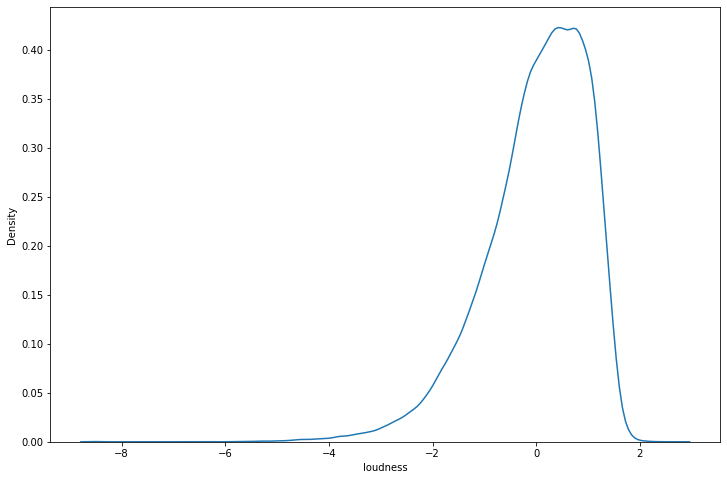

In [14]:
clear_data_object = mro.plotting_tool(clear_data_with_std)
clear_data_object.dataframe_kdeplot('loudness')

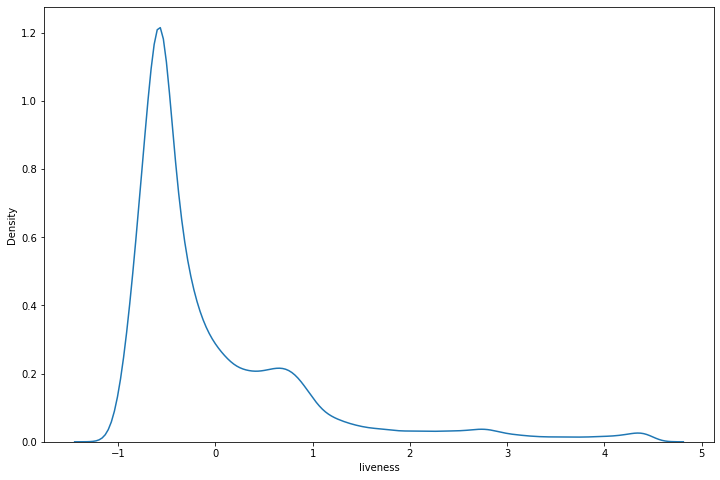

In [15]:
clear_data_object.dataframe_kdeplot('liveness')

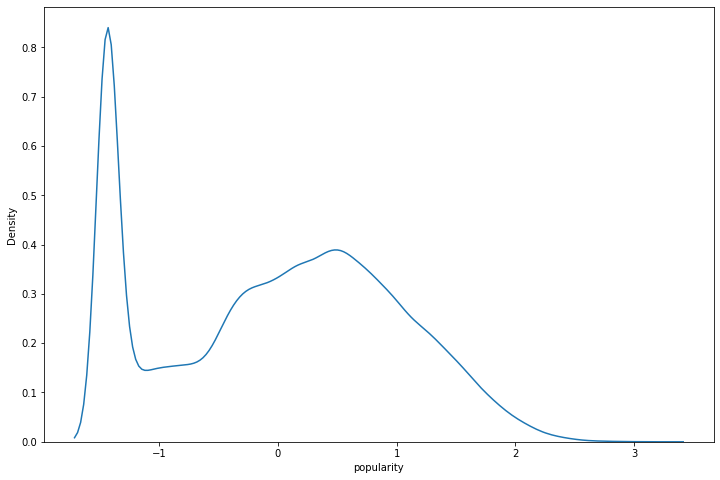

In [16]:
clear_data_object.dataframe_kdeplot('popularity')

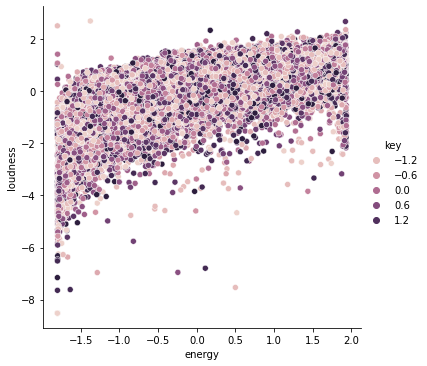

In [17]:
sns.relplot(x = 'energy', y= 'loudness',hue='key', data=spotify_data)

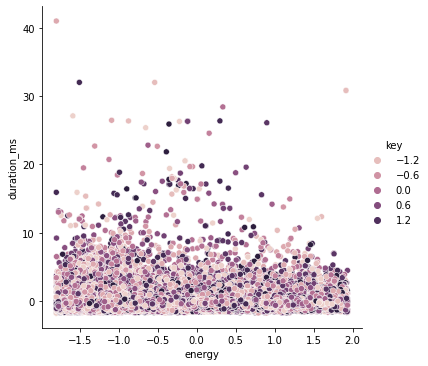

In [18]:
sns.relplot(x = 'energy', y= 'duration_ms',hue='key', data=spotify_data)

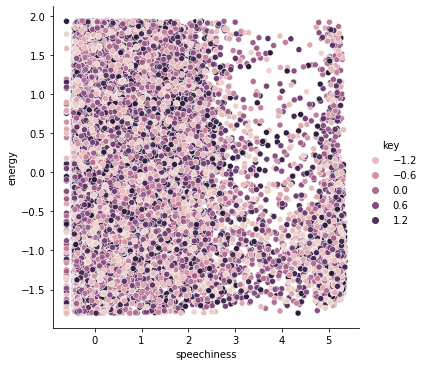

In [19]:
sns.relplot(x = 'speechiness', y= 'energy',hue="key", data=spotify_data)

In [20]:
# Utilizing box_plot() function from plotting tool class

print("Box_Plot Function :",mro.plotting_tool.box_plot.__doc__)

Box_Plot Function :  This function helps in box plotting the data frame values which can help you understand outliers in your dataset 


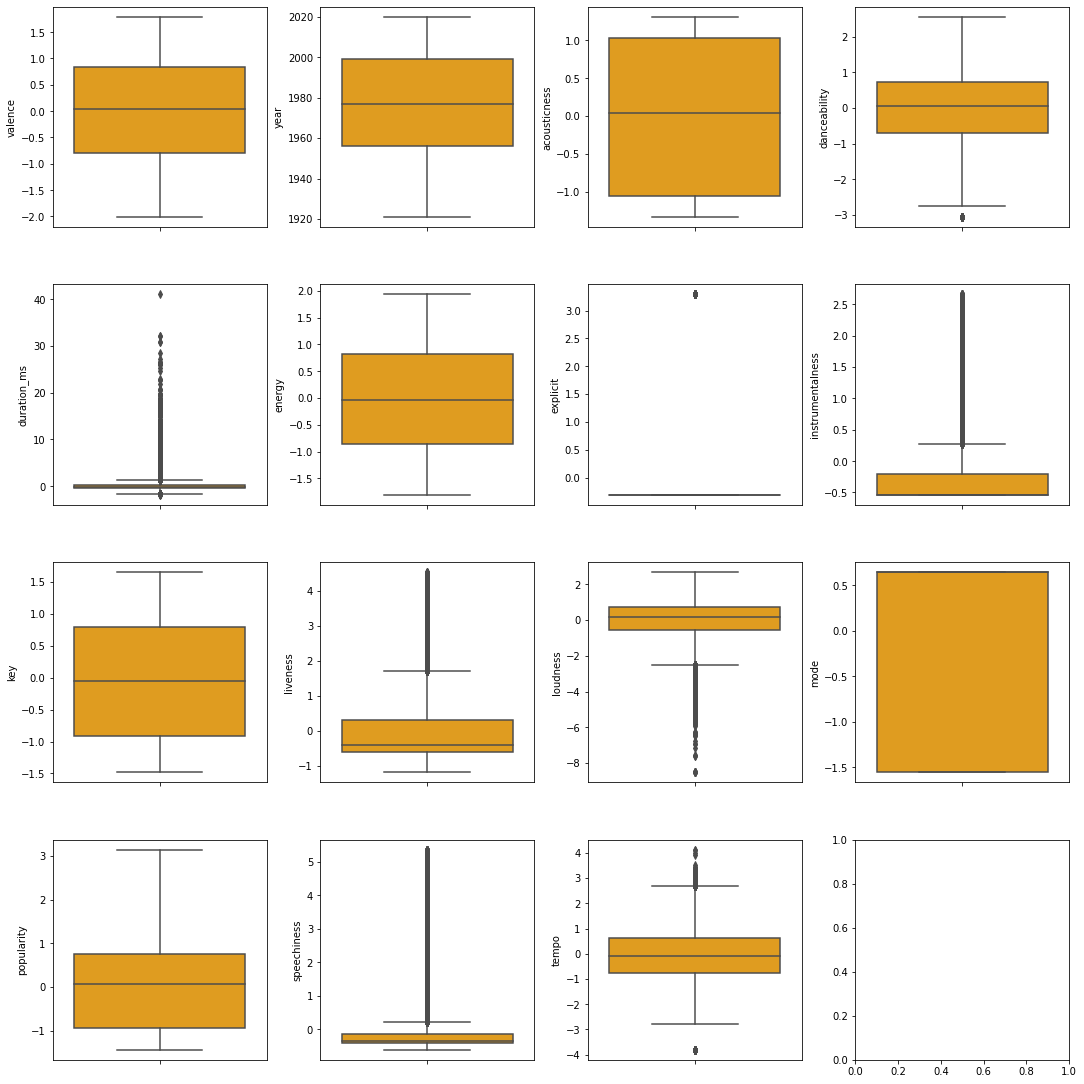

In [21]:
clear_data_object.box_plot()

In [22]:
# Utlizing the correlation() function from plotting tool class

print("Correlation Function :",mro.plotting_tool.correlation.__doc__)

Correlation Function : This function helps in plotting the correlation heat map for the data, correlation between the features can very well be understanded using this map.


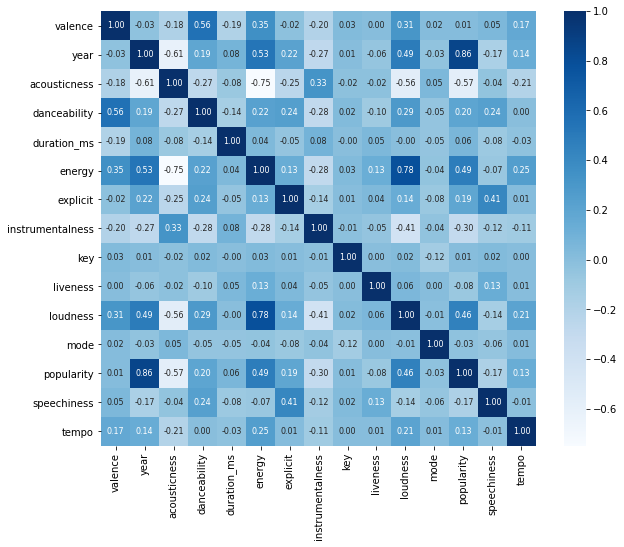

In [23]:
clear_data_object.correlation()

## Model building

In [24]:
model_nn = NearestNeighbors(metric = 'euclidean',algorithm = 'auto',n_jobs = -1,n_neighbors = 5)

model_nn.fit(remove_string_dataset)

NearestNeighbors(metric='euclidean', n_jobs=-1)

In [25]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(model_nn, files)

In [26]:
with open('model_pkl', 'rb') as files:
    model = pickle.load(files)

In [27]:
query_index = np.random.choice(remove_string_dataset.shape[0])
print(query_index)
distances,indices = model.kneighbors(remove_string_dataset.iloc[query_index,:].values.reshape(1,-1),n_neighbors=8)


109947


In [28]:
distances

array([[0.        , 1.23379064, 1.25857519, 1.4126277 , 1.47024912,
        1.48655727, 1.58896158, 1.62311426]])

In [29]:
indices

array([[109947,  60051,  23982,  93672,  23603, 110197,   4978, 141608]],
      dtype=int64)

In [30]:
for i in range(0,len(distances.flatten())):
    if i == 0:
        print("Recommendation for song -> {0} -:\n".format(spotity_copy_data.iloc[query_index]['name']))
    else:
        print('{0}: {1} -> with distance of {2}:'.format(i,spotity_copy_data.iloc[indices[0][i]]['name'],distances.flatten()[i]))


Recommendation for song -> Bashful Baby Blues -:

1: ¿Dónde Está Lo Que Soñé? - Remasterizado -> with distance of 1.233790640339179:
2: Aaj Biraj Mein Holi Ho Rasiya -> with distance of 1.2585751889531591:
3: Violin Sonata in A Major, D. 574, Op. 162: II. Scherzo - Presto -> with distance of 1.4126276976687344:
4: Holi Khelibe Giridhari, Pt. 2 -> with distance of 1.4702491225783179:
5: Dukh Dard Se Jag Men Koi Azad Nahin -> with distance of 1.4865572663312272:
6: Don't You Believe It -> with distance of 1.588961579379281:
7: Me Llaman el Solitario - Remasterizado -> with distance of 1.623114261855621:
